# Support Vector Machines

At this point in the semester, you have learned about support vector machines and kernels and how they are used to find linear and nonlinear decision boundaries for binary classification. In completing this notebook you will become more familiar with some important concepts in machine learning:

- __Mathematical optimization__
    - Review Lagrange multipliers and constrained optimization
- __Kernel methods__
    - Experiment with polynomial and RBF kernels to perform nonlinear classification
    - Observe example scenarios in which linear kernels fail
    - Choose the right kernel for different problems
- __Hyperparameter tuning__
    - Automate the selection of SVM regularization hyperparameter on a held-out dataset
- __Interpreting weights and support vectors__
    - Train a linear SVM for digit detection
    - Interpret weights and support vectors

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import util
import runClassifier
import datasets
import matplotlib.pyplot as plt
import sklearn

import lagrangian
import svm

## Lagrange multipliers and constrained optimization

As you have learned in the lecture on SVMs, Lagrangians help to convert constrained optimization problems to unconstrained ones, which is useful for finding optimal-margin classifiers. Here we will visualize an example of this technique in action.

Let's start with an abstract example. Suppose we have the following constrained optimization problem

$$
\begin{equation*}
\begin{aligned}
& \underset{x}{\text{minimize}}
& & x^2+10 \\
& \text{subject to}
& & x \geq 3
\end{aligned}
\end{equation*}
$$

represented by the following figure.

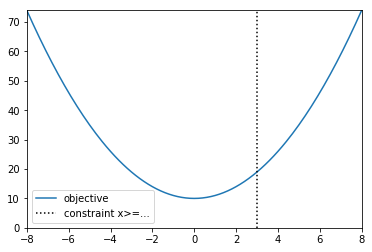

In [2]:
%matplotlib inline
lagrangian.makePlot('objective')

Applying the Lagrangian method, we'll create a Lagrangian function that we can minimize without constraints. Let's plot the Lagrangian. The plot is 3D, so you can spin it around. You might need to run the cell a few times to get the graphics to show.

<IPython.core.display.Javascript object>


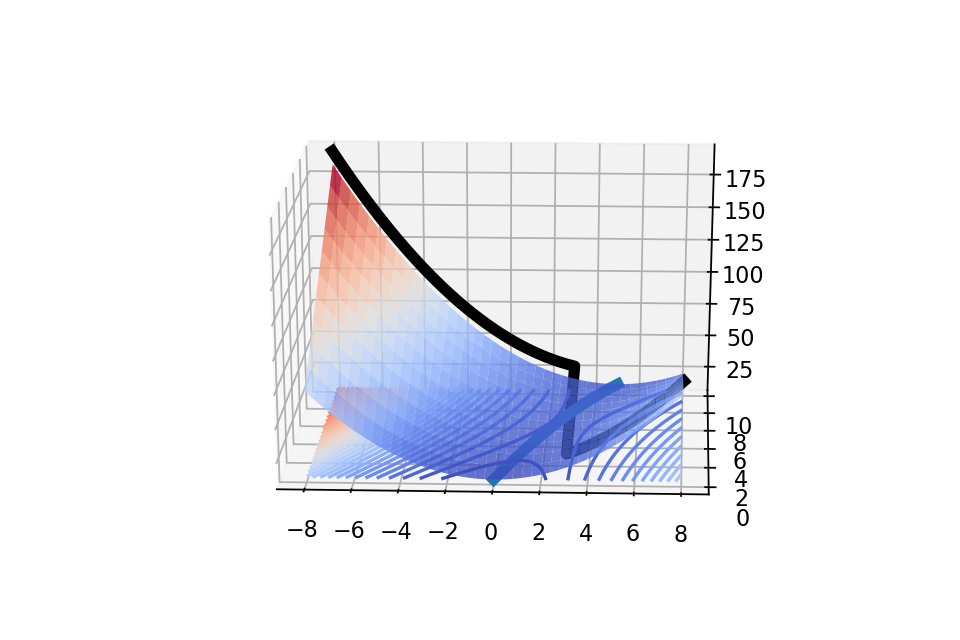

In [93]:
%matplotlib notebook
%matplotlib notebook
lagrangian.makePlot('lagrangian')

The Lagrangian is the surface you see with colors ranging from cool to warm. The axis ranging from -8 to +8 is $x$. The axis ranging from 0 to 10 is $\alpha$. Now, we can maximize this function over $\alpha$ and minimize over $x$. The black line shows the optimal (maximal) value of $\alpha$ for any given $x$. The blue line shows the optimal (minimal) value of $x$ for any given $\alpha$. We can also see this with a contour plot.

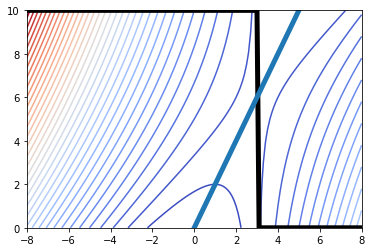

In [4]:
%matplotlib inline
lagrangian.makePlot('contour')

Let's show the optimization problem just as a function of $\alpha$. That is, for any given value of $\alpha$, we find the value of the Lagrangian if we fix $\alpha$ and maximize over $x$.

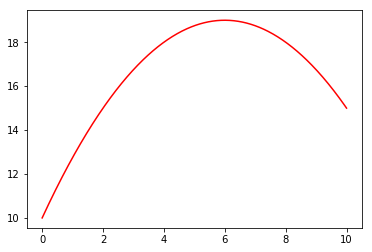

In [5]:
%matplotlib inline
lagrangian.makePlot('alpha')

Let's check that this makes sense. We will look at the Lagrangian again.

<IPython.core.display.Javascript object>


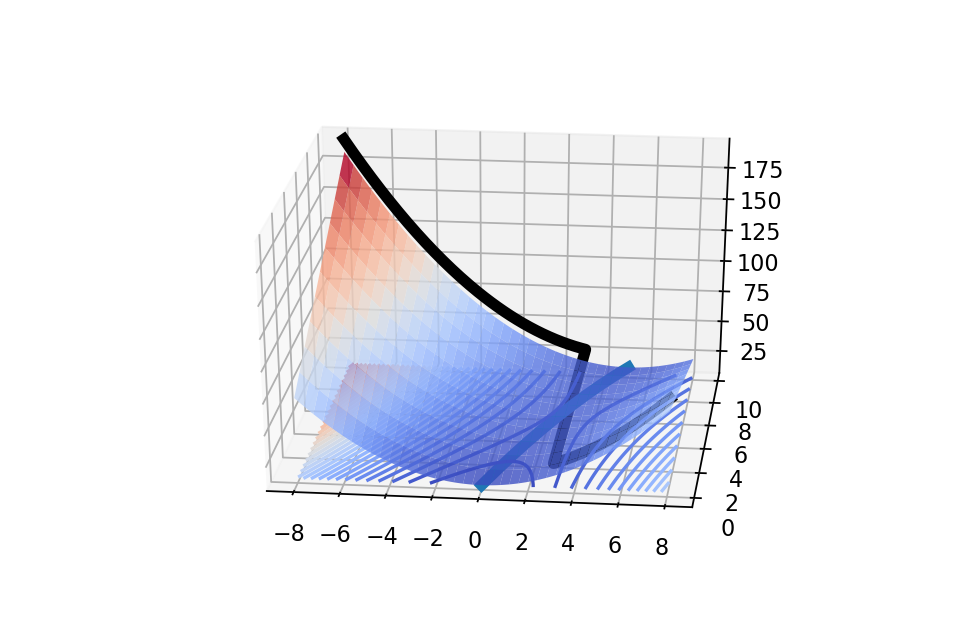

In [91]:
%matplotlib notebook
%matplotlib notebook
lagrangian.makePlot('lagrangian')

__QUESTION 1:__ Spin the 3D figure around so that you're looking at it from the perspective of $x$ (so you see -8..8 on the x-axis and the 0..10 axis is going "away" from you). You should be able to see a saddle point in the black curve where it hits a minimum. For what value of $x$ does it attain that minimum? Is this consistent with Figure 4 above (the optimization problem as function of $\alpha$)?

__ANSWER 1:__ The black curve obtains a minimum at the x value of 3. This does not match the minimum of the curve specified by the optimization problem as a function of alpha which has a critical value at x=6.

Suppose we change the constraint to $x \geq -2$, instead of the current $x \geq 3$. Let's make all the plots for this new problem.

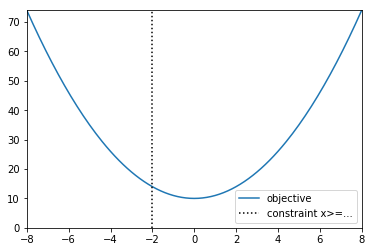

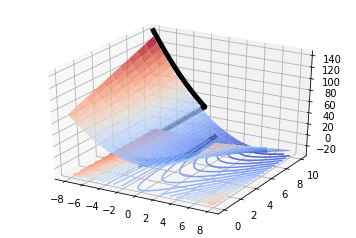

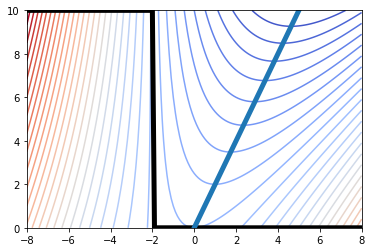

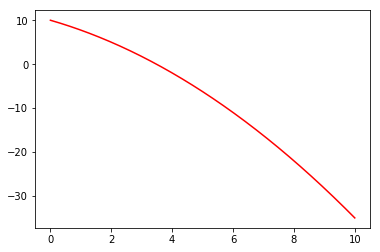

In [87]:
%matplotlib inline
lagrangian.makePlot('all', constraint_x_ge=-2)

<IPython.core.display.Javascript object>


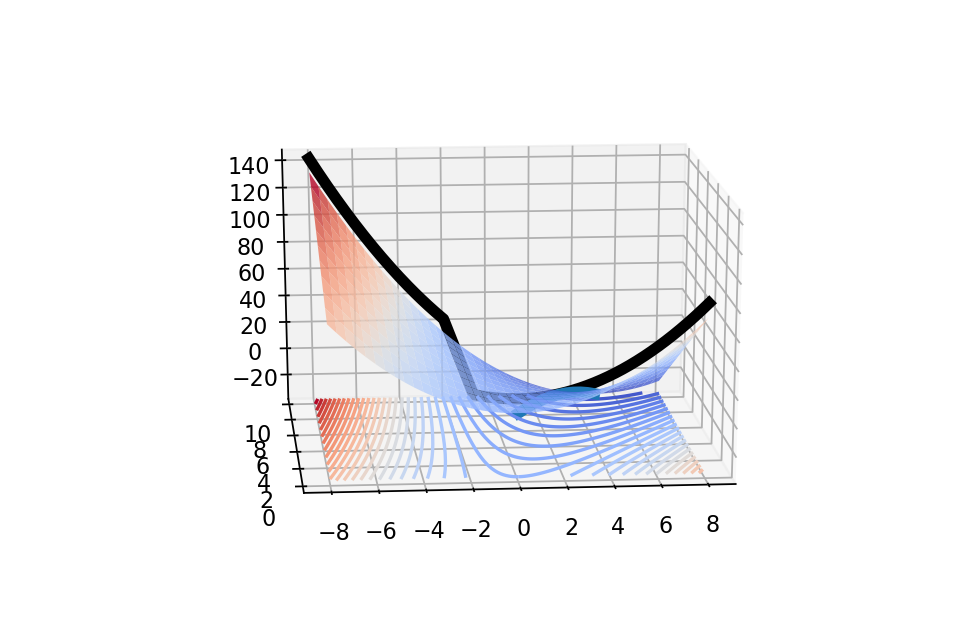

In [92]:
%matplotlib notebook
%matplotlib notebook
lagrangian.makePlot('lagrangian', constraint_x_ge=-2)

__QUESTION 2:__ Repeat question 1, but for this new figure.

__ANSWER 2:__ For the example with the restriction x >= -2, x=-2 is the minimum for the lagrangian problem which is not consistent with the optimization problem. 

__QUESTION 3:__ Look at the new Figure 4 (the optimization problem as a function of $\alpha$). Where is the optimum for $\alpha$? What does this tell you about the constraint in the constrained optimization?

__ANSWER 3:__  The optimum for alpha is at x=0. This tells us that the constraint in constrained optimization has an effect on the value of alpha for the optimization. If the constraint decreases, then the optimal value of alpha decreases and the minimum value of the lagrangian plot decreases. 

## Linear kernel

Now we will experiment with different kernels by applying the SVM to several classification problems. We will use `sklearn.svm`, which is a wrapper around LIBSVM. We will start by training a simple SVM with a linear kernel and regularization parameter C=100. The SVM will be trained on `Data0`, and we will save our model to `models/data0.model`.

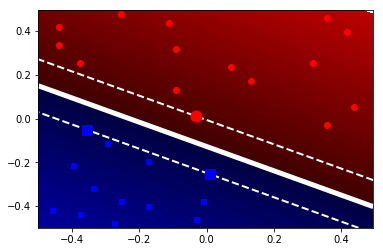

In [9]:
%matplotlib inline
data = datasets.Data0
svm.train(data.X, data.Y,'models/data0.model',k='linear',c=100)
svm.drawBoundary(data.X, data.Y,'models/data0.model')

This is an easily separable dataset, which is reflected by the small number of support vectors. In the plot, the SVs are drawn big (and are on the margin, the dashed line one unit away from the decision boundary, the solid line).

__QUESTION 4:__ You should have found that it takes 3 support vectors. Could you have fewer (eg., 2) support vectors here?

__ANSWER 4:__ Yes, you could make an arrangement that requires only 2 support vectors, however, that arrangement would not have an optimal margin of separation between the support vectors. 

## Polynomial kernel

Although it is unnecessary, suppose we wanted to use the polynomial kernel $K(x,z)=(1+x\cdot z)^{10}$. Then we would run

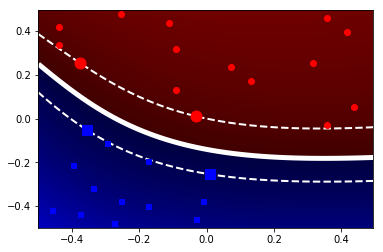

In [10]:
data = datasets.Data0
svm.train(data.X, data.Y,'models/data0.model',k='poly',c=100,r=1,d=10)
svm.drawBoundary(data.X, data.Y,'models/data0.model')

You'll see that you get a curved decision boundary, though of course this is somewhat overkill.

## RBF kernel

Let's try the RBF kernel with $\gamma =1$.

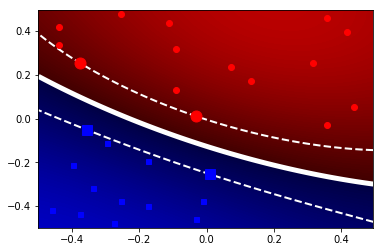

In [11]:
data = datasets.Data0
svm.train(data.X, data.Y,'models/data0.model',k='rbf',c=100,g=1)
svm.drawBoundary(data.X, data.Y,'models/data0.model')

Again, this is overkill. But we can try to understand RBF kernels a bit better by "turning up" the gamma:

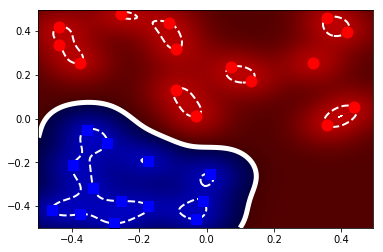

In [12]:
data = datasets.Data0
svm.train(data.X, data.Y,'models/data0.model',k='rbf',c=100,g=100)
svm.drawBoundary(data.X, data.Y,'models/data0.model')

A gamma of 100 means that you have to be really close to a point to have a kernel value that's non-zero.

__QUESTION 5:__ Why do you get these little blobs?

__ANSWER 5:__ We define gamma as the inverse of the standard deviation of the RBF kernel. We obtain small blobs for a high value of gamma, the standard deviation (as a function of distance) for points as the inverse of gamma must be very small. Because of this, points have to be very close to each other to satisfy this condition in order to have a non-zero hernel (or be considered similar enough to form a decision boundary). The small blobs have enough distance between them that for this particular value of gamma, they are donsidered different decision boundries.

__TASK 1:__ How high do you have to turn gamma up in order to get a little decision boundary around each example? Set gamma below.

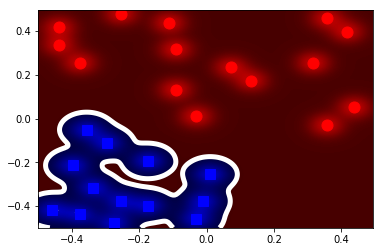

In [13]:
data = datasets.Data0
svm.train(data.X, data.Y,'models/data0.model',k='rbf',c=100,g=400)
svm.drawBoundary(data.X, data.Y,'models/data0.model')

## Choosing the right kernel

Let's now switch to a more complex dataset to see why choosing the right kernel matters. We'll begin by failing with a linear model:

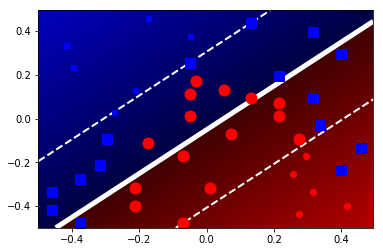

In [14]:
data = datasets.Data1
svm.train(data.X, data.Y,'models/data1.model',k='linear',c=100)
svm.drawBoundary(data.X, data.Y,'models/data1.model')

As you can see, this data fails horribly.

__QUESTION 6:__ There are a lot of red support vectors on the blue side of the decision boundary. Why?

__ANSWER 6:__ There are a lot of red support vectors on the blue side of the decision boundary because we are trying to separate non-linearly seperable data using a linear kernel function. Because of this, there is no way to create a decision boundary that does not misclassify at least some portion of the red points. 

However, now we can get some mileage out of polynomial kernels:

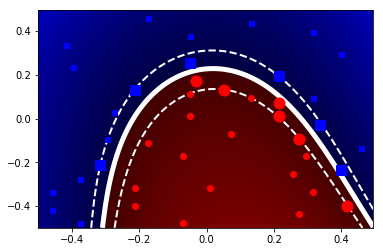

In [15]:
data = datasets.Data1
svm.train(data.X, data.Y,'models/data1.model',k='poly',c=100,r=1,d=3)
svm.drawBoundary(data.X, data.Y,'models/data1.model')

__QUESTION 7:__ Based on this data, is the 0/1 loss on the training data zero? Is the hinge loss on the training data zero?

__ANSWER 7:__ Based on this data, the 0/1 loss on the training data is zero since all points are classified correctly by the polynomial kernel function. The hinge loss on the training data is also zero since all points are classified correctly. l(y) = max(0,1-t*f(x)) is always 0 if every point is classified correctly. 

__TASK 2:__ Train an SVM with RBF kernel on this data. What's the smallest gamma for which you can get a good decision boundary?

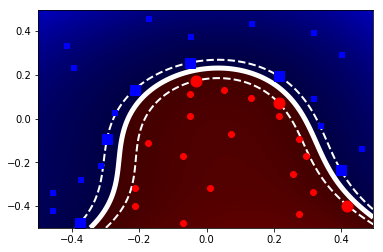

In [16]:
data = datasets.Data1
svm.train(data.X, data.Y,'models/data1.model',k='poly',c=100,r=1,d=3,g=10)
svm.drawBoundary(data.X, data.Y,'models/data1.model')

# A gamma value of 10 can create a very good decision boundary for the given data. 

## SVM regularization parameter

Let's train an SVM on a simple 2-dimensional binary classification task. Our dataset is `BinaryWithOutliers`, and we will save our model to `models/bwo.model`. Experiment with different values of the `C` regularization hyperparameter below.

[[0.20841754 2.19514041]]


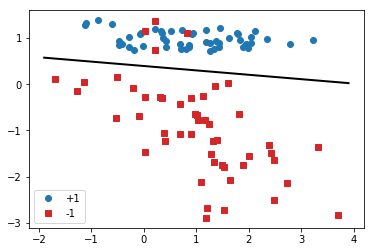

In [17]:
%matplotlib inline
data = datasets.BinaryWithOutliers
f = svm.train(data.X, data.Y,'models/bwo.model',k='linear',c=1)
runClassifier.plotDataAndBoundary(data.X,data.Y,f.coef_[0],f.intercept_[0])
print(f.coef_)

[[0.13645273 2.48353669]]


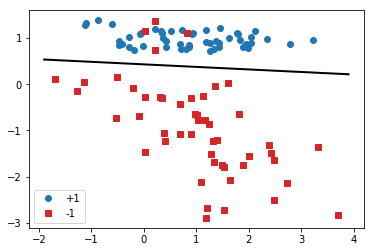

In [18]:
%matplotlib inline
data = datasets.BinaryWithOutliers
f = svm.train(data.X, data.Y,'models/bwo.model',k='linear',c=10)
runClassifier.plotDataAndBoundary(data.X,data.Y,f.coef_[0],f.intercept_[0])
print(f.coef_)

[[0.1185402  2.74011106]]


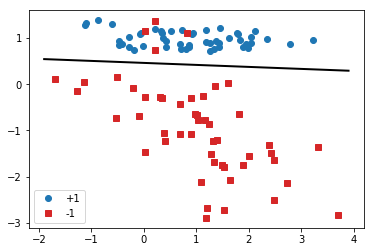

In [19]:
%matplotlib inline
data = datasets.BinaryWithOutliers
f = svm.train(data.X, data.Y,'models/bwo.model',k='linear',c=100)
runClassifier.plotDataAndBoundary(data.X,data.Y,f.coef_[0],f.intercept_[0])
print(f.coef_)

[[0.19000502 2.88295723]]


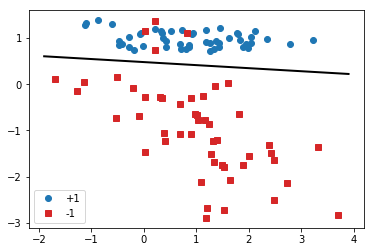

In [20]:
%matplotlib inline
data = datasets.BinaryWithOutliers
f = svm.train(data.X, data.Y,'models/bwo.model',k='linear',c=500)
runClassifier.plotDataAndBoundary(data.X,data.Y,f.coef_[0],f.intercept_[0])
print(f.coef_)

[[0.19004301 2.88388706]]


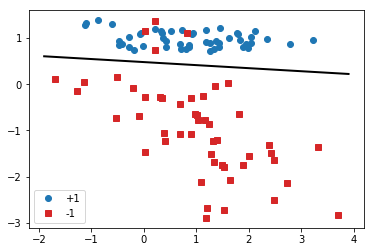

In [104]:
%matplotlib inline
data = datasets.BinaryWithOutliers
f = svm.train(data.X, data.Y,'models/bwo.model',k='linear',c=1000)
runClassifier.plotDataAndBoundary(data.X,data.Y,f.coef_[0],f.intercept_[0])
print(f.coef_)

__QUESTION 8:__ Which values of `C` lead to underfitting? Which values lead to overfitting? Why?

__ANSWER 8:__  For higher values of C there is a higher possibility of overfitting, while for lower values of C there is a higher possibility of underfitting. I.E. as C grows larger fewer wrongly classified examples are allowed (or the highest the price the pay in the loss function). Then when C tends towards larger values, the solution tends to have more of a hard-margin (allows no miss-classification). When C tends to 0 (without being 0) then more the miss-classifications are allowed.

This establishes the basic idea of why it is important to tune the regularization parameter. Let's move on to the sentiment prediction task. We want to train a linear SVM on `SentimentData`, and choose the best value for `C`. We will estimate underfitting and overfitting on a held-out subset of the training data. We will use an 80/20 train/validation split of the first 400 examples in `SentimentData`, because training the SVM on the full dataset takes some time. In the real world, you will want to use as much data as possible.

In [22]:
data = datasets.SentimentData
t = 320
v = 80
trainX,trainY = data.X[0:t],data.Y[0:t]
valX,valY = data.X[t:t+v],data.Y[t:t+v]

__TASK 3:__ Given `trainX`,`trainY`,`valX`,`valY`, write code below to automate the process of choosing a good value for `C`. You must store your best `C` in `bestC`. To compute the score of a trained model `f` on inputs in `X` and corresponding labels in `Y`, write `f.score(X,Y)`.

In [114]:
# NEEDS TO BE FIXED

bestC = 0
bval = 0
for cval in range(1,11):
    cv = cval*cval*cval
    f = svm.train(trainX, trainY, 'models/sentiment.model', k='linear', c=cv)
    val = f.score(valX, valY)
    if val > bval:
        bestC = cv
        bval  = val
        
####################

In [115]:
bestC # run this cell so that we can see it

1

## SVM for digit detection

We will train a support vector machine to classify digits as 1 or 2, with a dataset of 100 grayscale images of resolution 28x28. The images have been reshaped to 784 for training.

In [26]:
data = datasets.DigitData
f = svm.train(data.X, data.Y,'models/digit.model',k='linear',c=100, prob=True)

It should train very quickly, as the dataset is rather small. Let's get the weight vector and the support vectors. There should be about 28 support vectors.

In [27]:
w = f.coef_
svs = f.support_vectors_

__TASK 4:__ Write a method `show_wimg` that takes in a weight vector of length 784, converts it to a 28x28 image with color intensity values (0 to 255), and displays it with `plt.imshow`. We will use it to display the weight vector and support vectors.

In [85]:
def show_wimg(w):
    w = w.flatten()
    w0 = ((w-min(w))/(max(w)-min(w)))*255
    new_w = w0.reshape((28,28)).astype(int)
    plt.imshow(new_w)

Now we can visualize the weight vector.

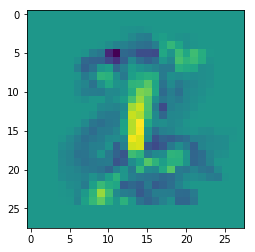

In [86]:
show_wimg(w)

__QUESTION 9:__ Inspect the image of the weight vector. What does this weight vector tell you about how it classifies images as either 1 or 2?

__ANSWER 9:__ The weight vector tells us that the foremost consideration when classifying images as either 1 or 2 is placed upon the center of the image. It seems that features that would more likely signify a 1 are given a high weight like a long straight line in the middle of the picture, while features that would strongly signify a 2, like a curved line from the right to left side of the image and a diagonal from the bottom left to the top right have very small weights. So large weights (~255) correspond to a 1 and small weights (~0) correspond to a 2. Much of the image that isn't relavent to a 1 or a 2 is classified almost right in the middle (135) supporting my evaluation since those areas have no relation towards the image being a 1 or a 2. 

Change the index in the code below to display some support vectors. Try to understand what these support vectors suggest about the classifier. See if you can find anything unique about them.

28


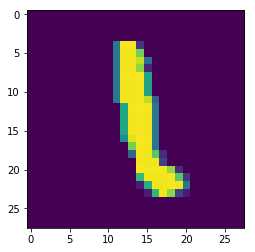

In [80]:
print(len(svs))
show_wimg(svs[27])

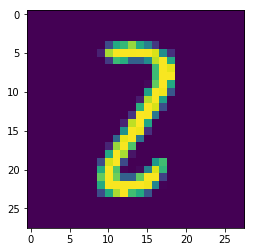

In [81]:
show_wimg(svs[0])

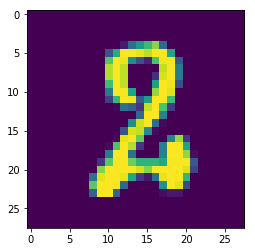

In [82]:
show_wimg(svs[10])

__QUESTION 10:__ What did you find? Based on your understanding of how support vectors are used to find an optimal-margin decision boundary, what do the nature of the support vectors, and how many there are, suggest about this SVM's ability to generalize?

__ANSWER 10:__ Since there are 28 different support vectors, each of which have a very unique shape and size, I believe the SVM does a fair job of being able to generalize. If there are only 100 total images in the dataset and 28 of them are support vectors, then at worst, the classifier would have 72% accuracy. But at the same time, a large hyperparameter and a large number of support vectors for the dataset size could be an indicator that the SVM is overfitting the image dataset which would negatively impact the SVM's ability to generalize over a new dataset. 

## Learn more

### LIBSVM
- [LIBSVM -- A Library for Support Vector Machines](https://www.csie.ntu.edu.tw/~cjlin/libsvm/)
- [1.4. Support Vector Machines — scikit-learn 0.20.0 documentation](https://scikit-learn.org/stable/modules/svm.html)